In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) # to display all columns
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# change column names to all lowercase
df.columns = map(str.lower, df.columns)

In [5]:
# convert "No / Yes" binary options to numerical 0s and 1s
binary_columns = ['partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn']
df[binary_columns] = df[binary_columns].eq('Yes').mul(1)

# convert the categorical variables that have numeric significance into numerical
df.multiplelines = df.multiplelines.map({'No phone service':0, 'No':1, 'Yes':2})
df.contract = df.contract.map({'Month-to-month':0, 'One year':1, 'Two year':2})

# convert "Male / Female" binary options to numerical 0s and 1s
df['gender'] = df['gender'].eq('Female').mul(1)

In [6]:
df = df.drop(columns = 'customerid') # drop 'customerid' column.
df['totalcharges'] = df['totalcharges'].replace(' ', np.nan, regex=True) # replaces blank to NaN
df = df.dropna() # drop the NaN values
df['totalcharges'] = df.totalcharges.astype(float) # converts to float

In [7]:
# create dummy variables
df_dummified = pd.get_dummies(df, drop_first=True, dtype=int)

# Run a vanilla model based upon the information given. Use that as a benchmark.


In [8]:
# Scale the data
scale = MinMaxScaler()
df_dummified = pd.DataFrame(scale.fit_transform(df_dummified.values),
                            columns=df_dummified.columns,index=df_dummified.index)

In [9]:
df_dummified.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,contract,paperlessbilling,monthlycharges,totalcharges,churn,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.115423,0.001275,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.5,0.5,0.0,0.385075,0.215867,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.014085,1.0,0.5,0.0,1.0,0.354229,0.010310,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.5,0.0,0.239303,0.210241,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.014085,1.0,0.5,0.0,1.0,0.521891,0.015330,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# Create features and labels
X = df_dummified.drop('churn', axis=1)  
y = df_dummified['churn'] 

# Perform an train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [11]:
# CREATING A PIPELINE
def pipeline(name_of_pipeline, classifier, X_train, y_train, X_test, y_test):
    '''Creates and displays the pipeline classifiers along with the report of metrics'''
    name_of_pipeline = Pipeline([('classifier', classifier)])
    name_of_pipeline.fit(X_train, y_train)
    y_pred_test = name_of_pipeline.predict(X_test)
    y_pred_train = name_of_pipeline.predict(X_train)
    
    report = classification_report(y_test, y_pred_test, output_dict=True)
    df = pd.DataFrame(report).transpose()
    
    print(df)
    print('\n\n')
    print(name_of_pipeline.fit(X_train, y_train))
    print('\n\n')
    print('Training Precision: ', round(precision_score(y_train, y_pred_train),3))
    print('Testing Precision: ', round(precision_score(y_test, y_pred_test),3))
    print('\n\n')
    print('Training Recall: ', round(recall_score(y_train, y_pred_train),3))
    print('Testing Recall: ', round(recall_score(y_test, y_pred_test),3))
    print('\n\n')
    print('Training Accuracy: ', round(accuracy_score(y_train, y_pred_train),3))
    print('Testing Accuracy: ', round(accuracy_score(y_test, y_pred_test),3))
    print('\n\n')
    print('Training F1-Score: ', round(f1_score(y_train, y_pred_train),3))
    print('Testing F1-Score: ', round(f1_score(y_test, y_pred_test),3))
    return

In [12]:
# defining the three different classification modeling techniques that will be used throughout this project
dt = DecisionTreeClassifier(random_state=0, max_depth=4)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=4)

In [13]:
# CALL THE PIPELINE
pipeline('pipe_1', dt, X_train, y_train, X_test, y_test)

              precision    recall  f1-score      support
0.0            0.833131  0.886378  0.858930  1549.000000
1.0            0.619048  0.509804  0.559140   561.000000
accuracy       0.786256  0.786256  0.786256     0.786256
macro avg      0.726089  0.698091  0.709035  2110.000000
weighted avg   0.776211  0.786256  0.779223  2110.000000



Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(max_depth=4, random_state=0))])



Training Precision:  0.643
Testing Precision:  0.619



Training Recall:  0.51
Testing Recall:  0.51



Training Accuracy:  0.794
Testing Accuracy:  0.786



Training F1-Score:  0.569
Testing F1-Score:  0.559


In [14]:
def visualizing_confusionmatrix(name_of_pipeline, classifier, X_train, y_train, X_test, y_test):
    '''Creates confusion matrices of the results from classifier'''
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    name_of_pipeline = Pipeline([('classifier', classifier)])
    name_of_pipeline.fit(X_train, y_train)
    y_pred_test = name_of_pipeline.predict(X_test)
    y_pred_train = name_of_pipeline.predict(X_train)
    
    #Plot Training Confusion Matrix
    plot_confusion_matrix(classifier, X_train, y_train, ax=axes[0,0],
                          display_labels=["Did Not Churn","Churned"])
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    #Plot Normalized Training Confusion Matrix
    plot_confusion_matrix(classifier, X_train, y_train, ax=axes[1,0], 
                          display_labels=["Did Not Churn","Churned"],
                          normalize='true')
    
    #Plot Test Confusion Matrix
    plot_confusion_matrix(classifier, X_test, y_test, ax=axes[0,1],
                          display_labels=["Did Not Churn","Churned"])
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    #Plot Normalized Test Confusion Matrix
    plot_confusion_matrix(classifier, X_test, y_test, ax=axes[1,1], 
                          display_labels=["Did Not Churn","Churned"],
                          normalize='true')
    
    axes[0,0].title.set_text(f'{classifier} Train')
    axes[0,1].title.set_text(f'{classifier} Test')
    axes[1,0].title.set_text(f'{classifier} Train')
    axes[1,1].title.set_text(f'{classifier} Test')
    
    plt.grid(False)
    plt.show()
    return

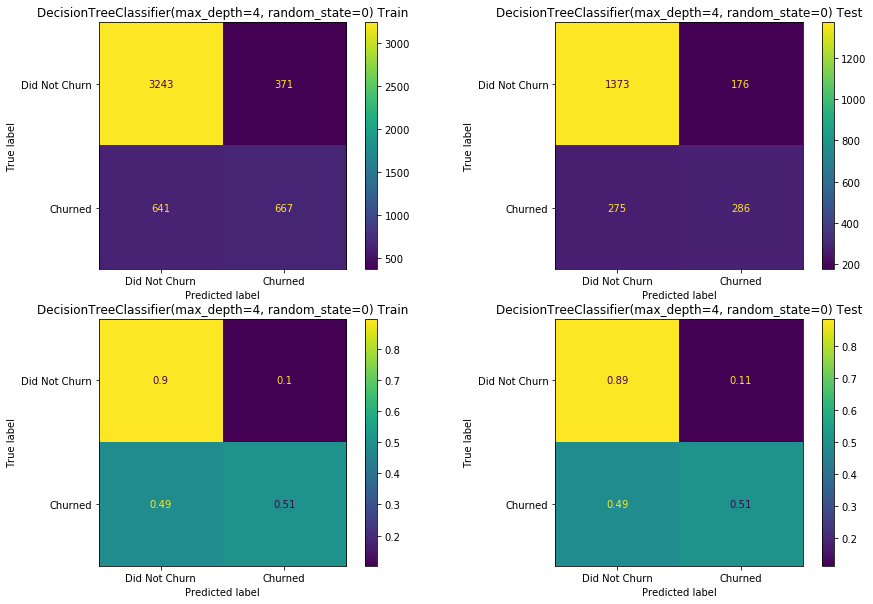

In [15]:
visualizing_confusionmatrix('pipe_1', dt, X_train, y_train, X_test, y_test)

In [16]:
def createROCCurve(name_of_pipeline, classifier, X_train, y_train, X_test, y_test):
    '''Creates and plots the ROC'''
    name_of_pipeline = Pipeline([('classifier', classifier)])
    name_of_pipeline.fit(X_train, y_train)
    y_train_score = name_of_pipeline.predict(X_train)
    
    # Calculate the fpr, tpr, and thresholds for the training set
    train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)
    
    # Calculate the probability scores of each point in the test set
    y_test_score = name_of_pipeline.predict(X_test)
    
    # Calculate the fpr, tpr, and thresholds for the test set
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    
    plt.figure(figsize=(15, 10))
    lw = 2
    plt.plot(train_fpr, train_tpr, color='darkorange', lw=lw,
             label=('ROC curve for the trained data, AUC={:.3f}'.format(auc(test_fpr, test_tpr))))
    plt.plot(test_fpr, test_tpr, color='red', lw=lw,
             label=('ROC curve for the test data, AUC={:.3f}'.format(auc(train_fpr, train_tpr))))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.title('Receiver operating characteristic (ROC) Curve', fontsize=20)
    plt.legend(loc='lower right')
    plt.show()
    return

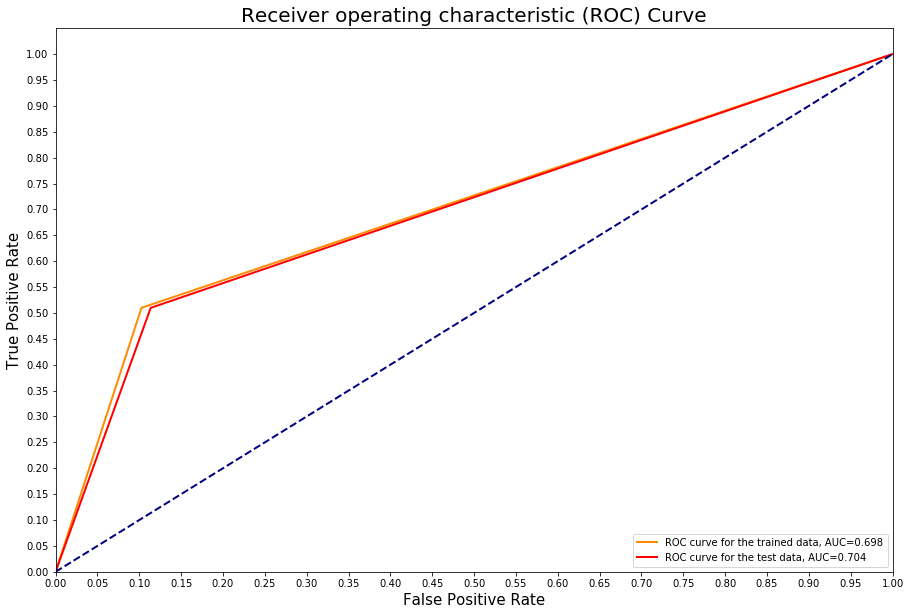

In [17]:
createROCCurve('pipe_1', dt, X_train, y_train, X_test, y_test)

## Results:
#### The baseline model is a Decision Tree
* The decision tree classifier has a max_depth=4
* Recall of the test data = 51.0%
* The baseline recall percentage of 51.0% in layman's terms means, "51.0% of customers who churned were correctly classified by the model."

## Goals:
#### Prioritize recall
* minimize Type II errors/false negative
* minimize costly situations where the company doesn't identify customers who are going to churn.

## Next Steps:
1. Address class imbalance (SMOTE)
2. Simplify the model by identifying and reducing unimportant features:
 * Feature engineering
 * LASSO - least absolute shrinkage and selection operator - L1 Regularization
3. Attempt different types of modeling techniques
 * KNN
 * Random Forests
4. Hyperparameter tuning (GridSearch to create multiple models with different hyperparameters)

In [18]:
def create_decisiontree(name_of_pipeline, classifier, dataframe, X_train, y_train, y):
    '''Creates and plots a decision tree'''
    name_of_pipeline = Pipeline([('classifier', classifier)])
    name_of_pipeline.fit(X_train, y_train)
    fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,10), dpi=300)
    tree.plot_tree(classifier, fontsize=5, feature_names = dataframe.columns,
                   class_names=np.unique(y).astype('str'), filled = True)
    for decision_box in tree.plot_tree(classifier, fontsize=5, feature_names = dataframe.columns,
                   class_names=np.unique(y).astype('str'), filled = True):
        arrow = decision_box.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor('red')
            arrow.set_linewidth(3)
    plt.show()
    return

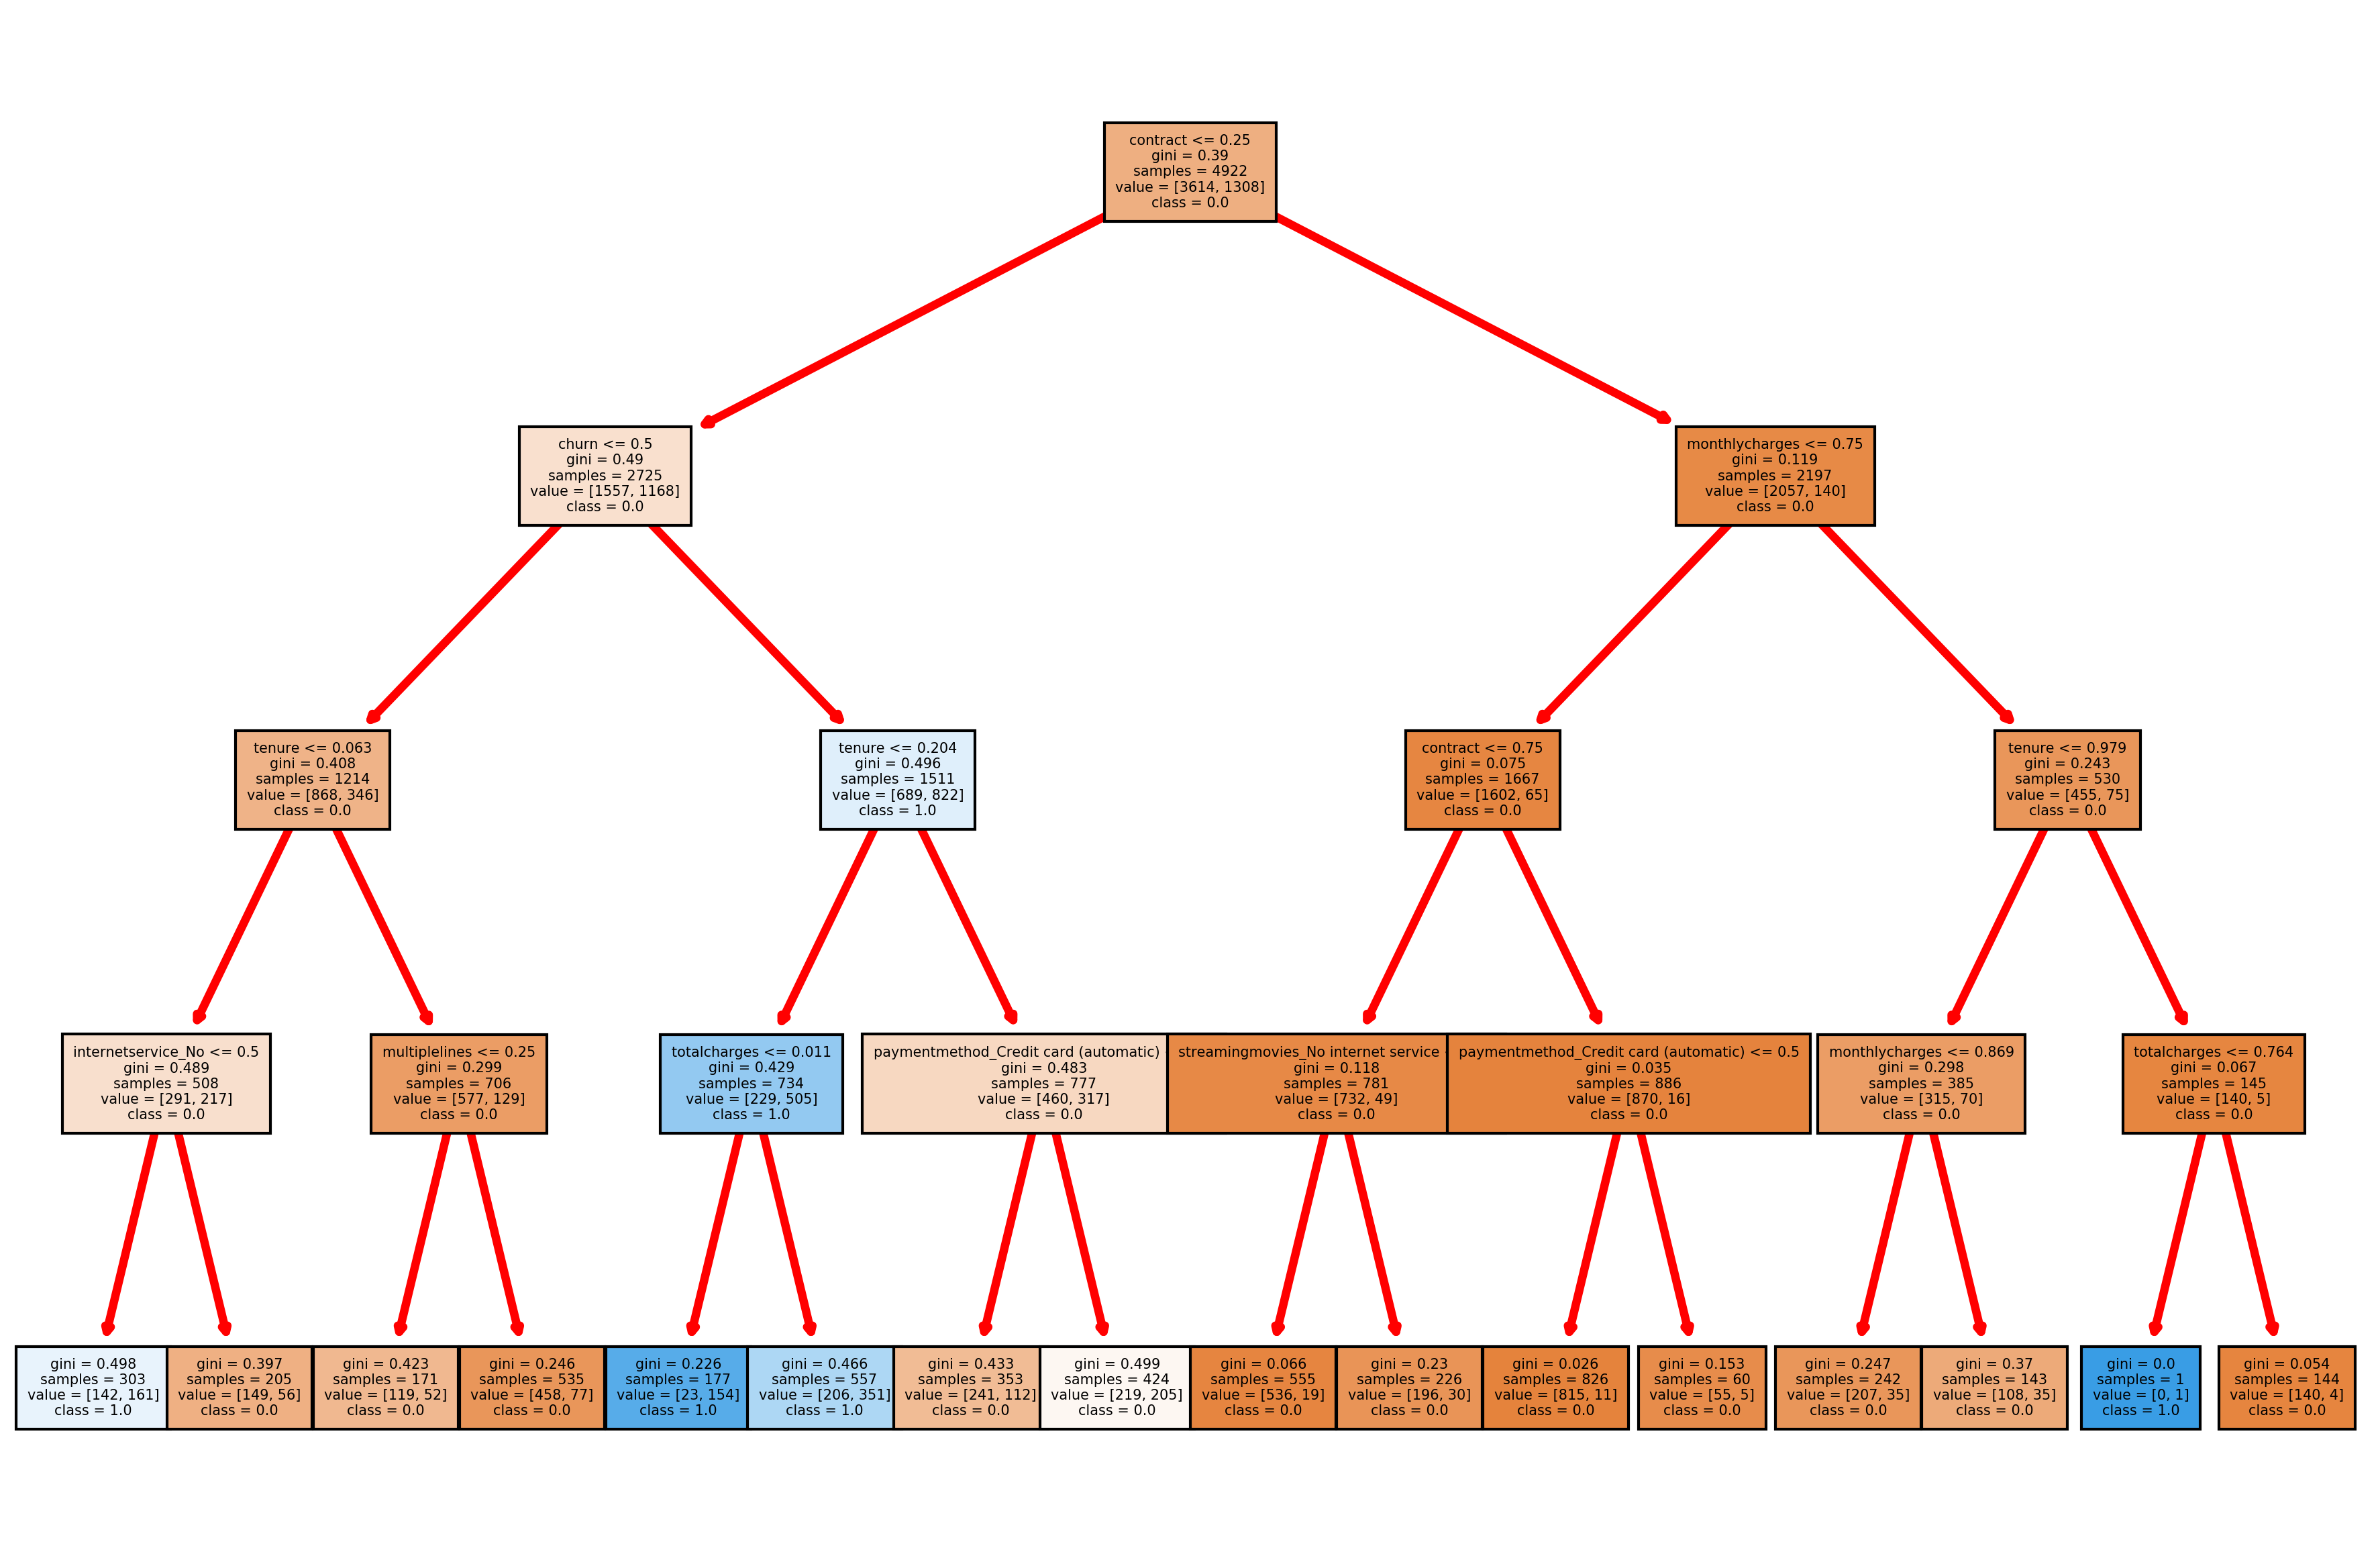

In [19]:
create_decisiontree('pipe_1', dt, df_dummified, X_train, y_train, y)

> Notes: Important features defining the nodes of the tree:
* 'contract'
* 'monthlycharges'
* 'paymentmethod_Credit card (automatic)'

# Model Iteration I - SMOTE and class balancing

In [20]:
smote = SMOTE(random_state=0, sampling_strategy=1)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_smote).value_counts()) 

Synthetic sample class distribution: 

1.0    3614
0.0    3614
Name: churn, dtype: int64


In [21]:
pipeline('pipe_2', dt, X_train_smote, y_train_smote, X_test, y_test)

              precision    recall  f1-score      support
0.0            0.889722  0.765655  0.823040  1549.000000
1.0            0.532819  0.737968  0.618834   561.000000
accuracy       0.758294  0.758294  0.758294     0.758294
macro avg      0.711270  0.751812  0.720937  2110.000000
weighted avg   0.794830  0.758294  0.768746  2110.000000



Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(max_depth=4, random_state=0))])



Training Precision:  0.78
Testing Precision:  0.533



Training Recall:  0.815
Testing Recall:  0.738



Training Accuracy:  0.792
Testing Accuracy:  0.758



Training F1-Score:  0.797
Testing F1-Score:  0.619


In [45]:
dt_balanced = DecisionTreeClassifier(random_state=0, max_depth=4, class_weight='balanced')

pipeline('pipe_3', dt_balanced, X_fe_train, y_fe_train, X_fe_test, y_fe_test)

              precision    recall  f1-score      support
0.0            0.885714  0.780504  0.829787  1549.000000
1.0            0.543624  0.721925  0.620214   561.000000
accuracy       0.764929  0.764929  0.764929     0.764929
macro avg      0.714669  0.751214  0.725001  2110.000000
weighted avg   0.794760  0.764929  0.774067  2110.000000



Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                                        random_state=0))])



Training Precision:  0.56
Testing Precision:  0.544



Training Recall:  0.742
Testing Recall:  0.722



Training Accuracy:  0.777
Testing Accuracy:  0.765



Training F1-Score:  0.638
Testing F1-Score:  0.62


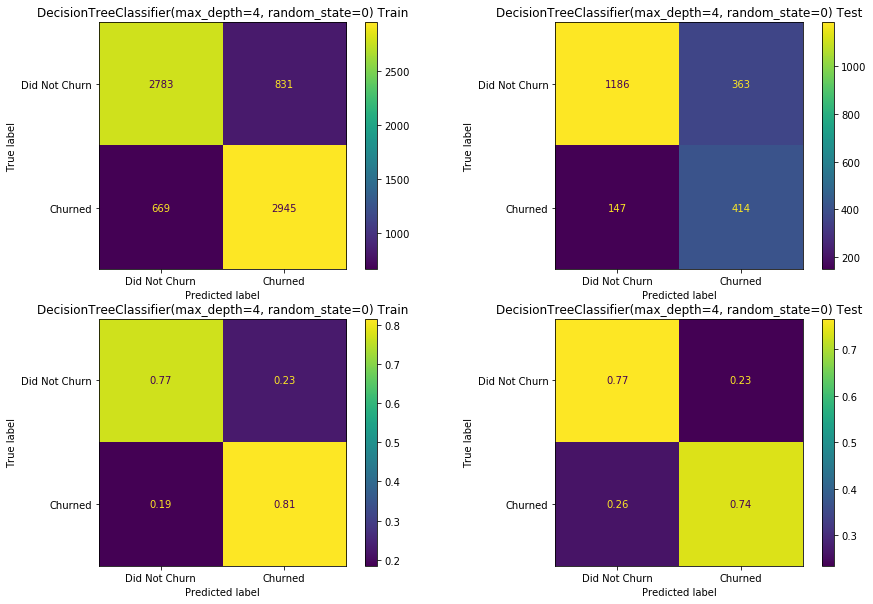

In [22]:
visualizing_confusionmatrix('pipe_2', dt, X_train_smote, y_train_smote, X_test, y_test)

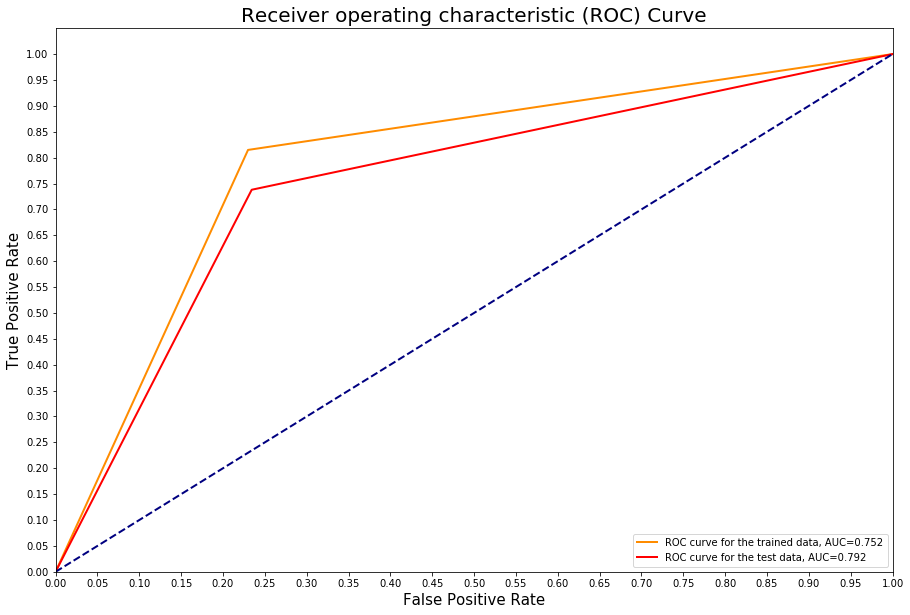

In [23]:
createROCCurve('pipe_2', dt, X_train_smote, y_train_smote, X_test, y_test)

## Results:
#### The first iteration model is a Decision Tree with addressing class imbalance using SMOTE
* The decision tree classifier has a max_depth=4
* Recall of the test data = 73.8%
* The baseline recall percentage of 73.8% in layman's terms means, "73.8% of customers who churned were correctly classified by the model."

## Next Steps:
1. Simplify the model by identifying and reducing unimportant features:
* Feature engineering
* LASSO - least absolute shrinkage and selection operator - L1 Regularization
2. Attempt different types of modeling techniques
* KNN
* Random Forests
3. Hyperparameter tuning (GridSearch to create multiple models with different hyperparameters)

# Model Iteration II - Feature engineering

In [49]:
# can drop 'phoneservice' column because 'multiplelines'
# already asks whether or not customer has phone service
df_featureengineered = df.drop(columns='phoneservice')

In [50]:
# convert "No / Yes" add-ons services to numerical 0s and 1s
add_on_services = ['onlinesecurity', 'onlinebackup', 'deviceprotection',
                   'techsupport', 'streamingtv', 'streamingmovies']
df_featureengineered[add_on_services] = df[add_on_services].eq('Yes').mul(1)
df_featureengineered[add_on_services] = df_featureengineered[add_on_services].astype(float)

In [51]:
# create a new column 'numberofaddons', which is the sum of the number of service add-ons a customer has
df_featureengineered['numberofaddons'] = df_featureengineered[add_on_services].sum(axis=1)

In [52]:
# drop all the individual columns relating to the single add-ons
df_featureengineered = df_featureengineered.drop(columns=add_on_services)

In [57]:
# drop all the column 'tenure' because it is more a qualitative, expressive category
# moreso about the length of time someone was a customer after the fact
df_featureengineered = df_featureengineered.drop(columns='tenure')

In [58]:
# create dummy variables
df_featureengineered_dummified = pd.get_dummies(df_featureengineered, drop_first=True, dtype=int)

# Scale the data
scale = MinMaxScaler()
df_featureengineered_dummified = pd.DataFrame(scale.fit_transform(df_featureengineered_dummified.values),
                                              columns=df_featureengineered_dummified.columns,
                                              index=df_featureengineered_dummified.index)

In [59]:
# Create features and labels
X_fe = df_featureengineered_dummified.drop('churn', axis=1)  
y_fe = df_featureengineered_dummified['churn'] 

# Perform an train_test_split = 70/30 for standard ML
X_fe_train, X_fe_test, y_fe_train, y_fe_test = train_test_split(X_fe, y_fe, test_size=0.3, random_state=0, stratify=y)

In [60]:
# SMOTE the data
smote = SMOTE(random_state=0, sampling_strategy=1)
X_fe_train_smote, y_fe_train_smote = smote.fit_sample(X_fe_train, y_fe_train) 
# Preview synthetic sample class distribution
print('Synthetic sample class distribution: \n')
print(pd.Series(y_fe_train_smote).value_counts()) 

Synthetic sample class distribution: 

1.0    3614
0.0    3614
Name: churn, dtype: int64


In [61]:
pipeline('pipe_4', dt, X_fe_train_smote, y_fe_train_smote, X_fe_test, y_fe_test)

              precision    recall  f1-score      support
0.0            0.915086  0.653970  0.762801  1549.000000
1.0            0.465603  0.832442  0.597187   561.000000
accuracy       0.701422  0.701422  0.701422     0.701422
macro avg      0.690345  0.743206  0.679994  2110.000000
weighted avg   0.795579  0.701422  0.718768  2110.000000



Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(max_depth=4, random_state=0))])



Training Precision:  0.725
Testing Precision:  0.466



Training Recall:  0.894
Testing Recall:  0.832



Training Accuracy:  0.778
Testing Accuracy:  0.701



Training F1-Score:  0.801
Testing F1-Score:  0.597


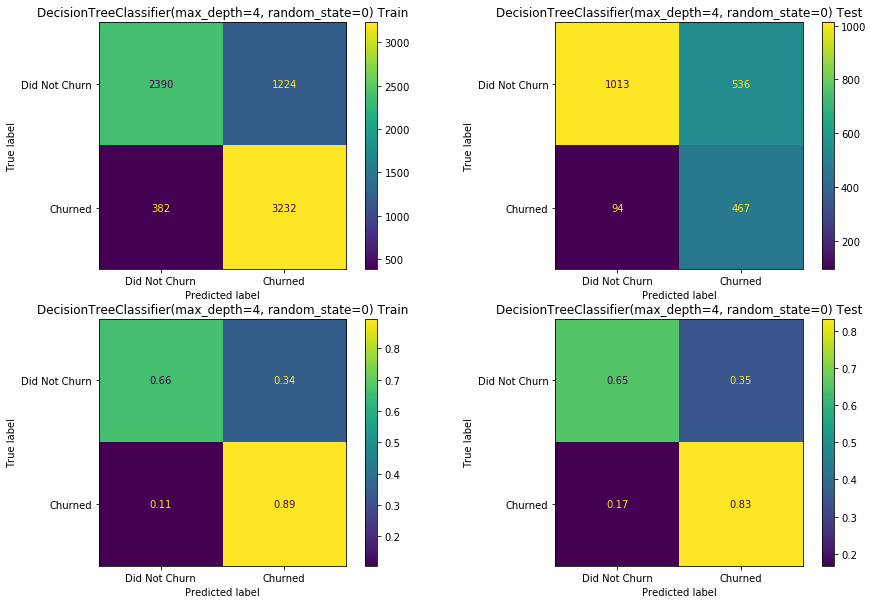

In [33]:
visualizing_confusionmatrix('pipe_4', dt, X_fe_train_smote, y_fe_train_smote, X_fe_test, y_fe_test)

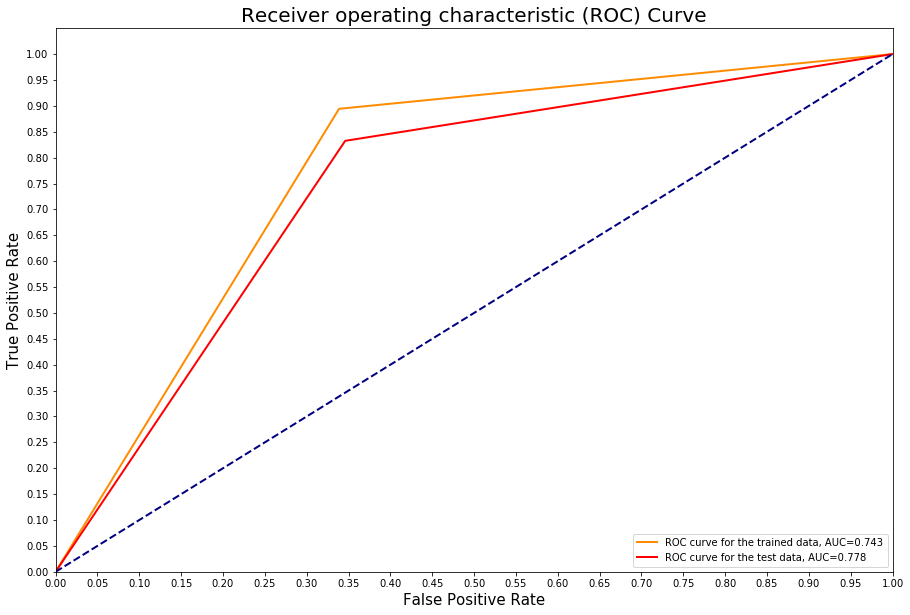

In [34]:
createROCCurve('pipe_4', dt, X_fe_train_smote, y_fe_train_smote, X_fe_test, y_fe_test)

## Results:
#### The second iteration model is a Decision Tree with feature engineering to remove unnecessary variables and addressing class imbalance using SMOTE
* The decision tree classifier has a max_depth=4
* Recall of the test data = 83.2%
* The baseline recall percentage of 83.2% in layman's terms means, "83.2% of customers who churned were correctly classified by the model."
* This model does not have as good as a recall as the previous model.

## Next Steps:
1. Attempt different types of modeling techniques
* KNN
* Random Forests
2. Hyperparameter tuning (GridSearch to create multiple models with different hyperparameters)

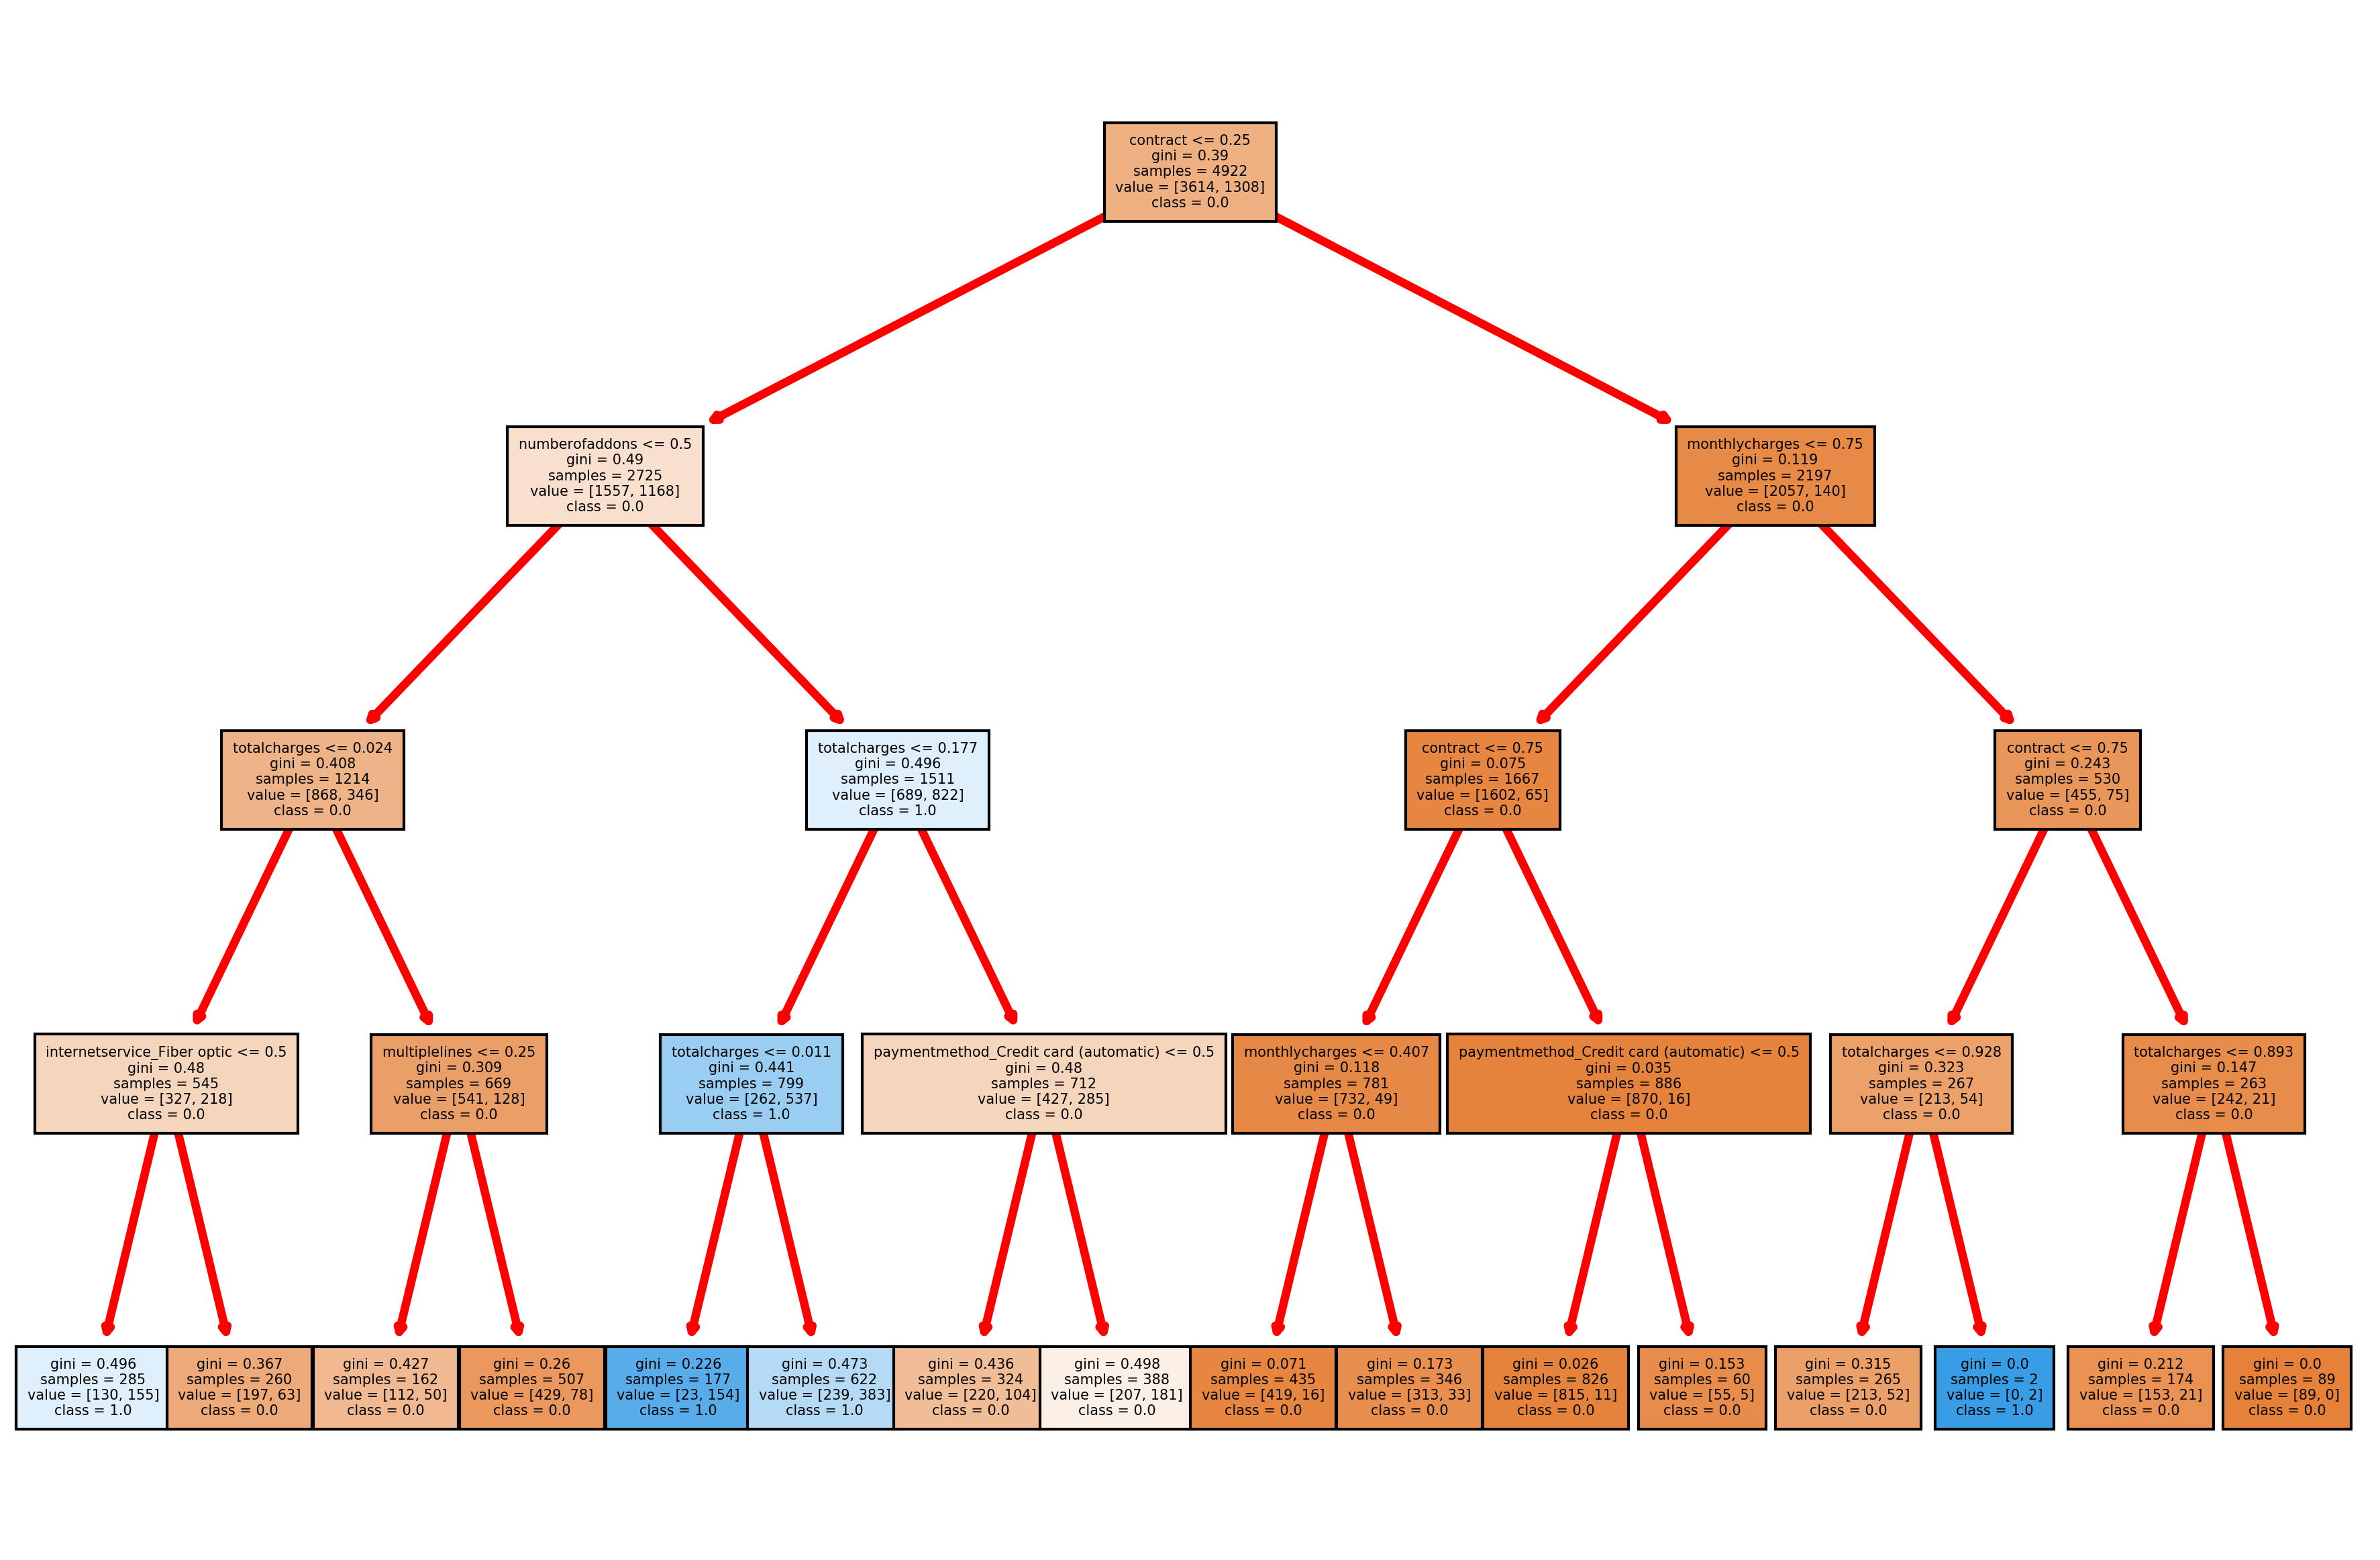

In [35]:
create_decisiontree('pipe_4', dt, df_featureengineered_dummified, X_fe_train, y_fe_train, y_fe)

> Notes: Important features defining the nodes of the tree:
* 'contract'
* 'monthlycharges'
* 'paymentmethod_Credit card (automatic)'

# Model Iteration III - Attempting different classification models

In [36]:
# KNN with SMOTE, but no feature engineering
pipeline('pipe_knn', knn, X_train_smote, y_train_smote, X_test, y_test)

              precision    recall  f1-score      support
0.0            0.857373  0.686895  0.762724  1549.000000
1.0            0.441887  0.684492  0.537063   561.000000
accuracy       0.686256  0.686256  0.686256     0.686256
macro avg      0.649630  0.685693  0.649893  2110.000000
weighted avg   0.746905  0.686256  0.702726  2110.000000



Pipeline(steps=[('classifier', KNeighborsClassifier())])



Training Precision:  0.806
Testing Precision:  0.442



Training Recall:  0.951
Testing Recall:  0.684



Training Accuracy:  0.861
Testing Accuracy:  0.686



Training F1-Score:  0.873
Testing F1-Score:  0.537


In [37]:
# KNN with SMOTE and feature engineering
pipeline('pipe_knn_fe', knn, X_fe_train_smote, y_fe_train_smote, X_fe_test, y_fe_test)

              precision    recall  f1-score      support
0.0            0.860166  0.734668  0.792479  1549.000000
1.0            0.477764  0.670232  0.557864   561.000000
accuracy       0.717536  0.717536  0.717536     0.717536
macro avg      0.668965  0.702450  0.675171  2110.000000
weighted avg   0.758494  0.717536  0.730100  2110.000000



Pipeline(steps=[('classifier', KNeighborsClassifier())])



Training Precision:  0.819
Testing Precision:  0.478



Training Recall:  0.929
Testing Recall:  0.67



Training Accuracy:  0.862
Testing Accuracy:  0.718



Training F1-Score:  0.871
Testing F1-Score:  0.558


In [38]:
# Random Forest with SMOTE, but no feature engineering
pipeline('pipe_rf', rf, X_train_smote, y_train_smote, X_test, y_test)

              precision    recall  f1-score     support
0.0            0.903614  0.726275  0.805297  1549.00000
1.0            0.509827  0.786096  0.618513   561.00000
accuracy       0.742180  0.742180  0.742180     0.74218
macro avg      0.706721  0.756186  0.711905  2110.00000
weighted avg   0.798915  0.742180  0.755636  2110.00000



Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=4, random_state=0))])



Training Precision:  0.766
Testing Precision:  0.51



Training Recall:  0.861
Testing Recall:  0.786



Training Accuracy:  0.799
Testing Accuracy:  0.742



Training F1-Score:  0.81
Testing F1-Score:  0.619


In [39]:
# Random Forest with SMOTE and feature engineering
pipeline('pipe_rf_fe', rf, X_fe_train_smote, y_fe_train_smote, X_fe_test, y_fe_test)

              precision    recall  f1-score      support
0.0            0.903941  0.710781  0.795808  1549.000000
1.0            0.497758  0.791444  0.611149   561.000000
accuracy       0.732227  0.732227  0.732227     0.732227
macro avg      0.700849  0.751112  0.703479  2110.000000
weighted avg   0.795946  0.732227  0.746711  2110.000000



Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=4, random_state=0))])



Training Precision:  0.753
Testing Precision:  0.498



Training Recall:  0.855
Testing Recall:  0.791



Training Accuracy:  0.787
Testing Accuracy:  0.732



Training F1-Score:  0.801
Testing F1-Score:  0.611


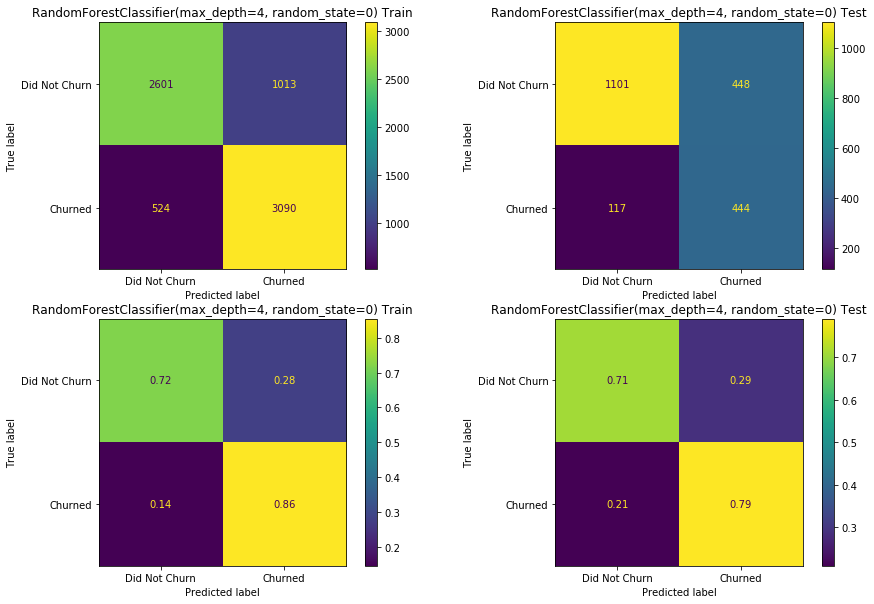

In [40]:
visualizing_confusionmatrix('pipe_rf_fe', rf, X_fe_train_smote, y_fe_train_smote, X_fe_test, y_fe_test)

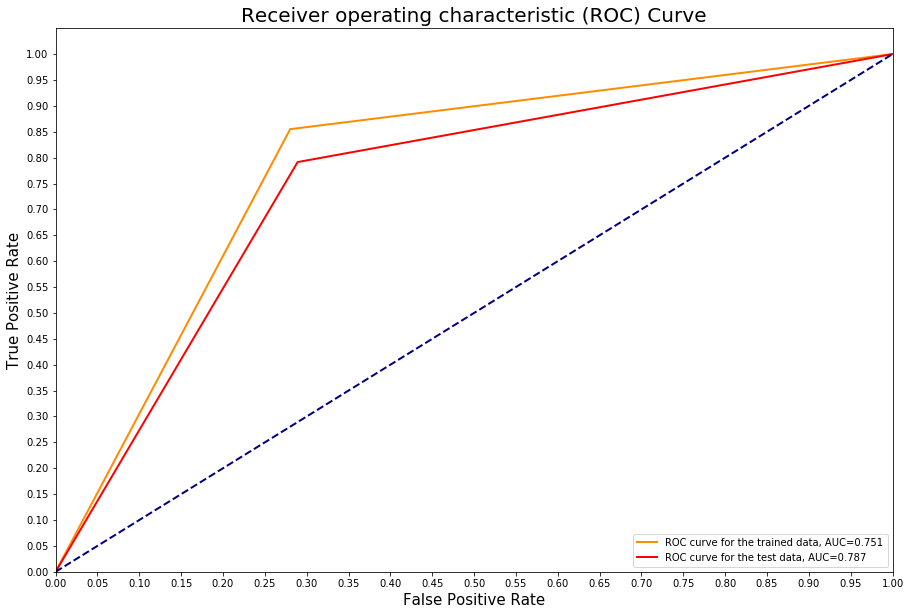

In [41]:
createROCCurve('pipe_rf_fe', rf, X_fe_train_smote, y_fe_train_smote, X_fe_test, y_fe_test)

## Results:
#### The third iteration model is a Random Forest with feature engineering to remove unnecessary variables and addressing class imbalance using SMOTE
* The random forest classifier has a max_depth=4
* Recall of the test data = 79.1%
* The recall percentage of 79.1% in layman's terms means, "79.1% of customers who churned were correctly classified by the model."

## Next Steps:
1. My best model thus far has been a decision tree; however, I notice that the training recall is substantially larger than the test recall. I am going to try to alter the model parameter, 'class_weights,' to balanced.
2. If this is helpful, I will continue to conduct some hyperparameter tuning using a GridSearch, and create a series of Decision Tree classifiers with different hyperparameters.

# Model Iteration IV - Hyperparameter tuning

In [48]:
df_featureengineered_dummified.head()

,gender,seniorcitizen,partner,dependents,multiplelines,contract,paperlessbilling,monthlycharges,totalcharges,churn,numberofaddons,internetservice_Fiber optic,internetservice_No,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.115423,0.001275,0.0,0.166667,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.385075,0.215867,0.0,0.333333,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.5,0.0,1.0,0.354229,0.010310,1.0,0.333333,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.239303,0.210241,0.0,0.500000,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.521891,0.015330,1.0,0.000000,1.0,0.0,0.0,1.0,0.0


In [46]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}


In [62]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'ccp_alpha': [0, 0.01, 0.02, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'max_features': ['sqrt', None],
    'min_samples_leaf': [1, 2, 3, 10],
    'min_samples_split': [2, 3, 10, 20],
}
# Create a based model
dt = DecisionTreeClassifier(random_state=0)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 2, scoring='recall')

In [63]:
# Fit the Decision Tree grid search to the data
grid_search.fit(X_fe_train_smote, y_fe_train_smote)
grid_search.best_params_

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:   16.9s finished


{'ccp_alpha': 0.01,
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [141]:
dt_best = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01, max_depth=4,
                                 min_samples_split=2, min_samples_leaf=1, max_features=None)

In [142]:
pipeline('pipe_dt_fe_best', dt_best, X_fe_train_smote, y_fe_train_smote, X_fe_test, y_fe_test)

              precision    recall  f1-score      support
0.0            0.922917  0.571982  0.706257  1549.000000
1.0            0.423478  0.868093  0.569258   561.000000
accuracy       0.650711  0.650711  0.650711     0.650711
macro avg      0.673197  0.720037  0.637758  2110.000000
weighted avg   0.790128  0.650711  0.669832  2110.000000



Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.01, max_depth=4,
                                        random_state=0))])



Training Precision:  0.683
Testing Precision:  0.423



Training Recall:  0.927
Testing Recall:  0.868



Training Accuracy:  0.748
Testing Accuracy:  0.651



Training F1-Score:  0.786
Testing F1-Score:  0.569


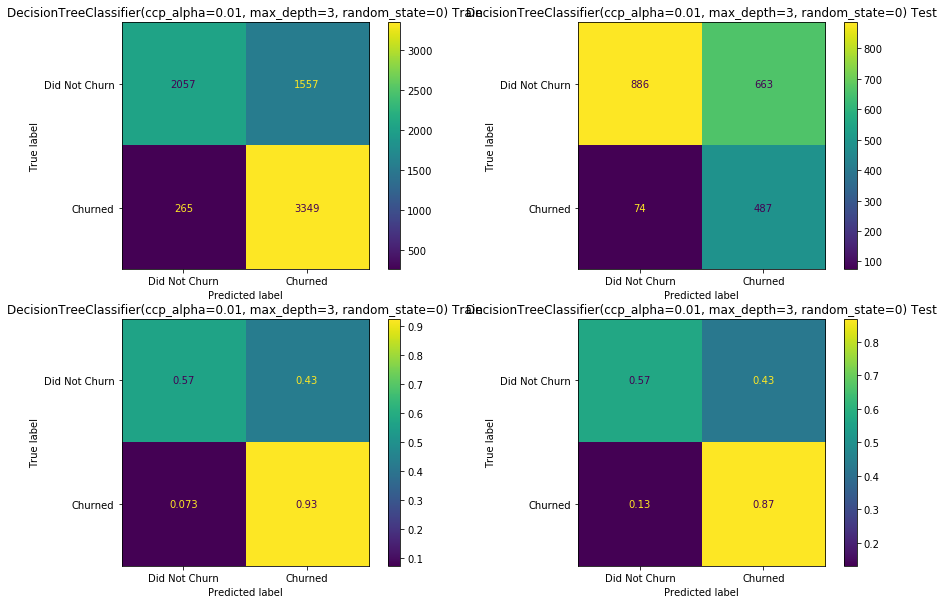

In [66]:
visualizing_confusionmatrix('pipe_dt_fe_best', dt_best, X_fe_train_smote, y_fe_train_smote, X_fe_test, y_fe_test)

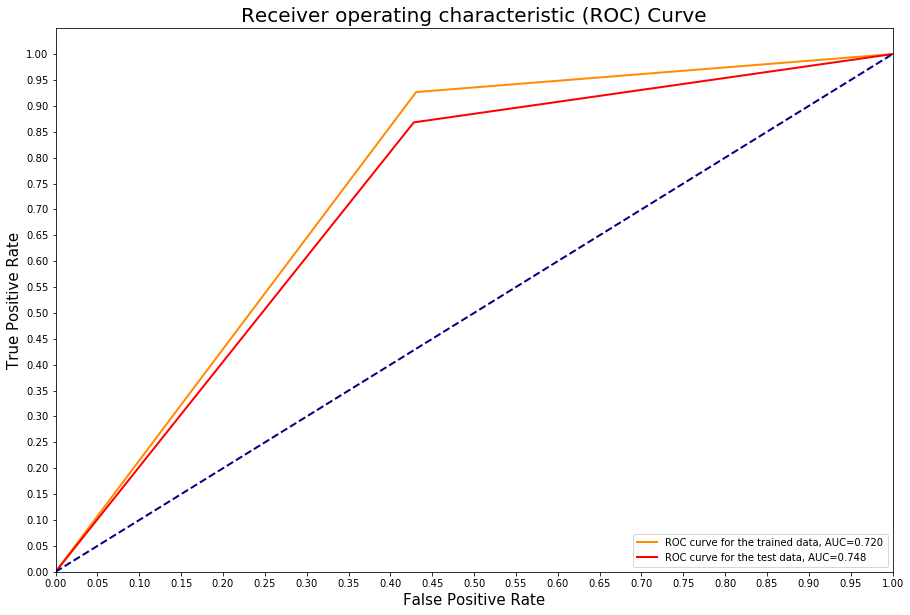

In [67]:
createROCCurve('pipe_dt_fe_best', dt_best, X_fe_train_smote, y_fe_train_smote, X_fe_test, y_fe_test)

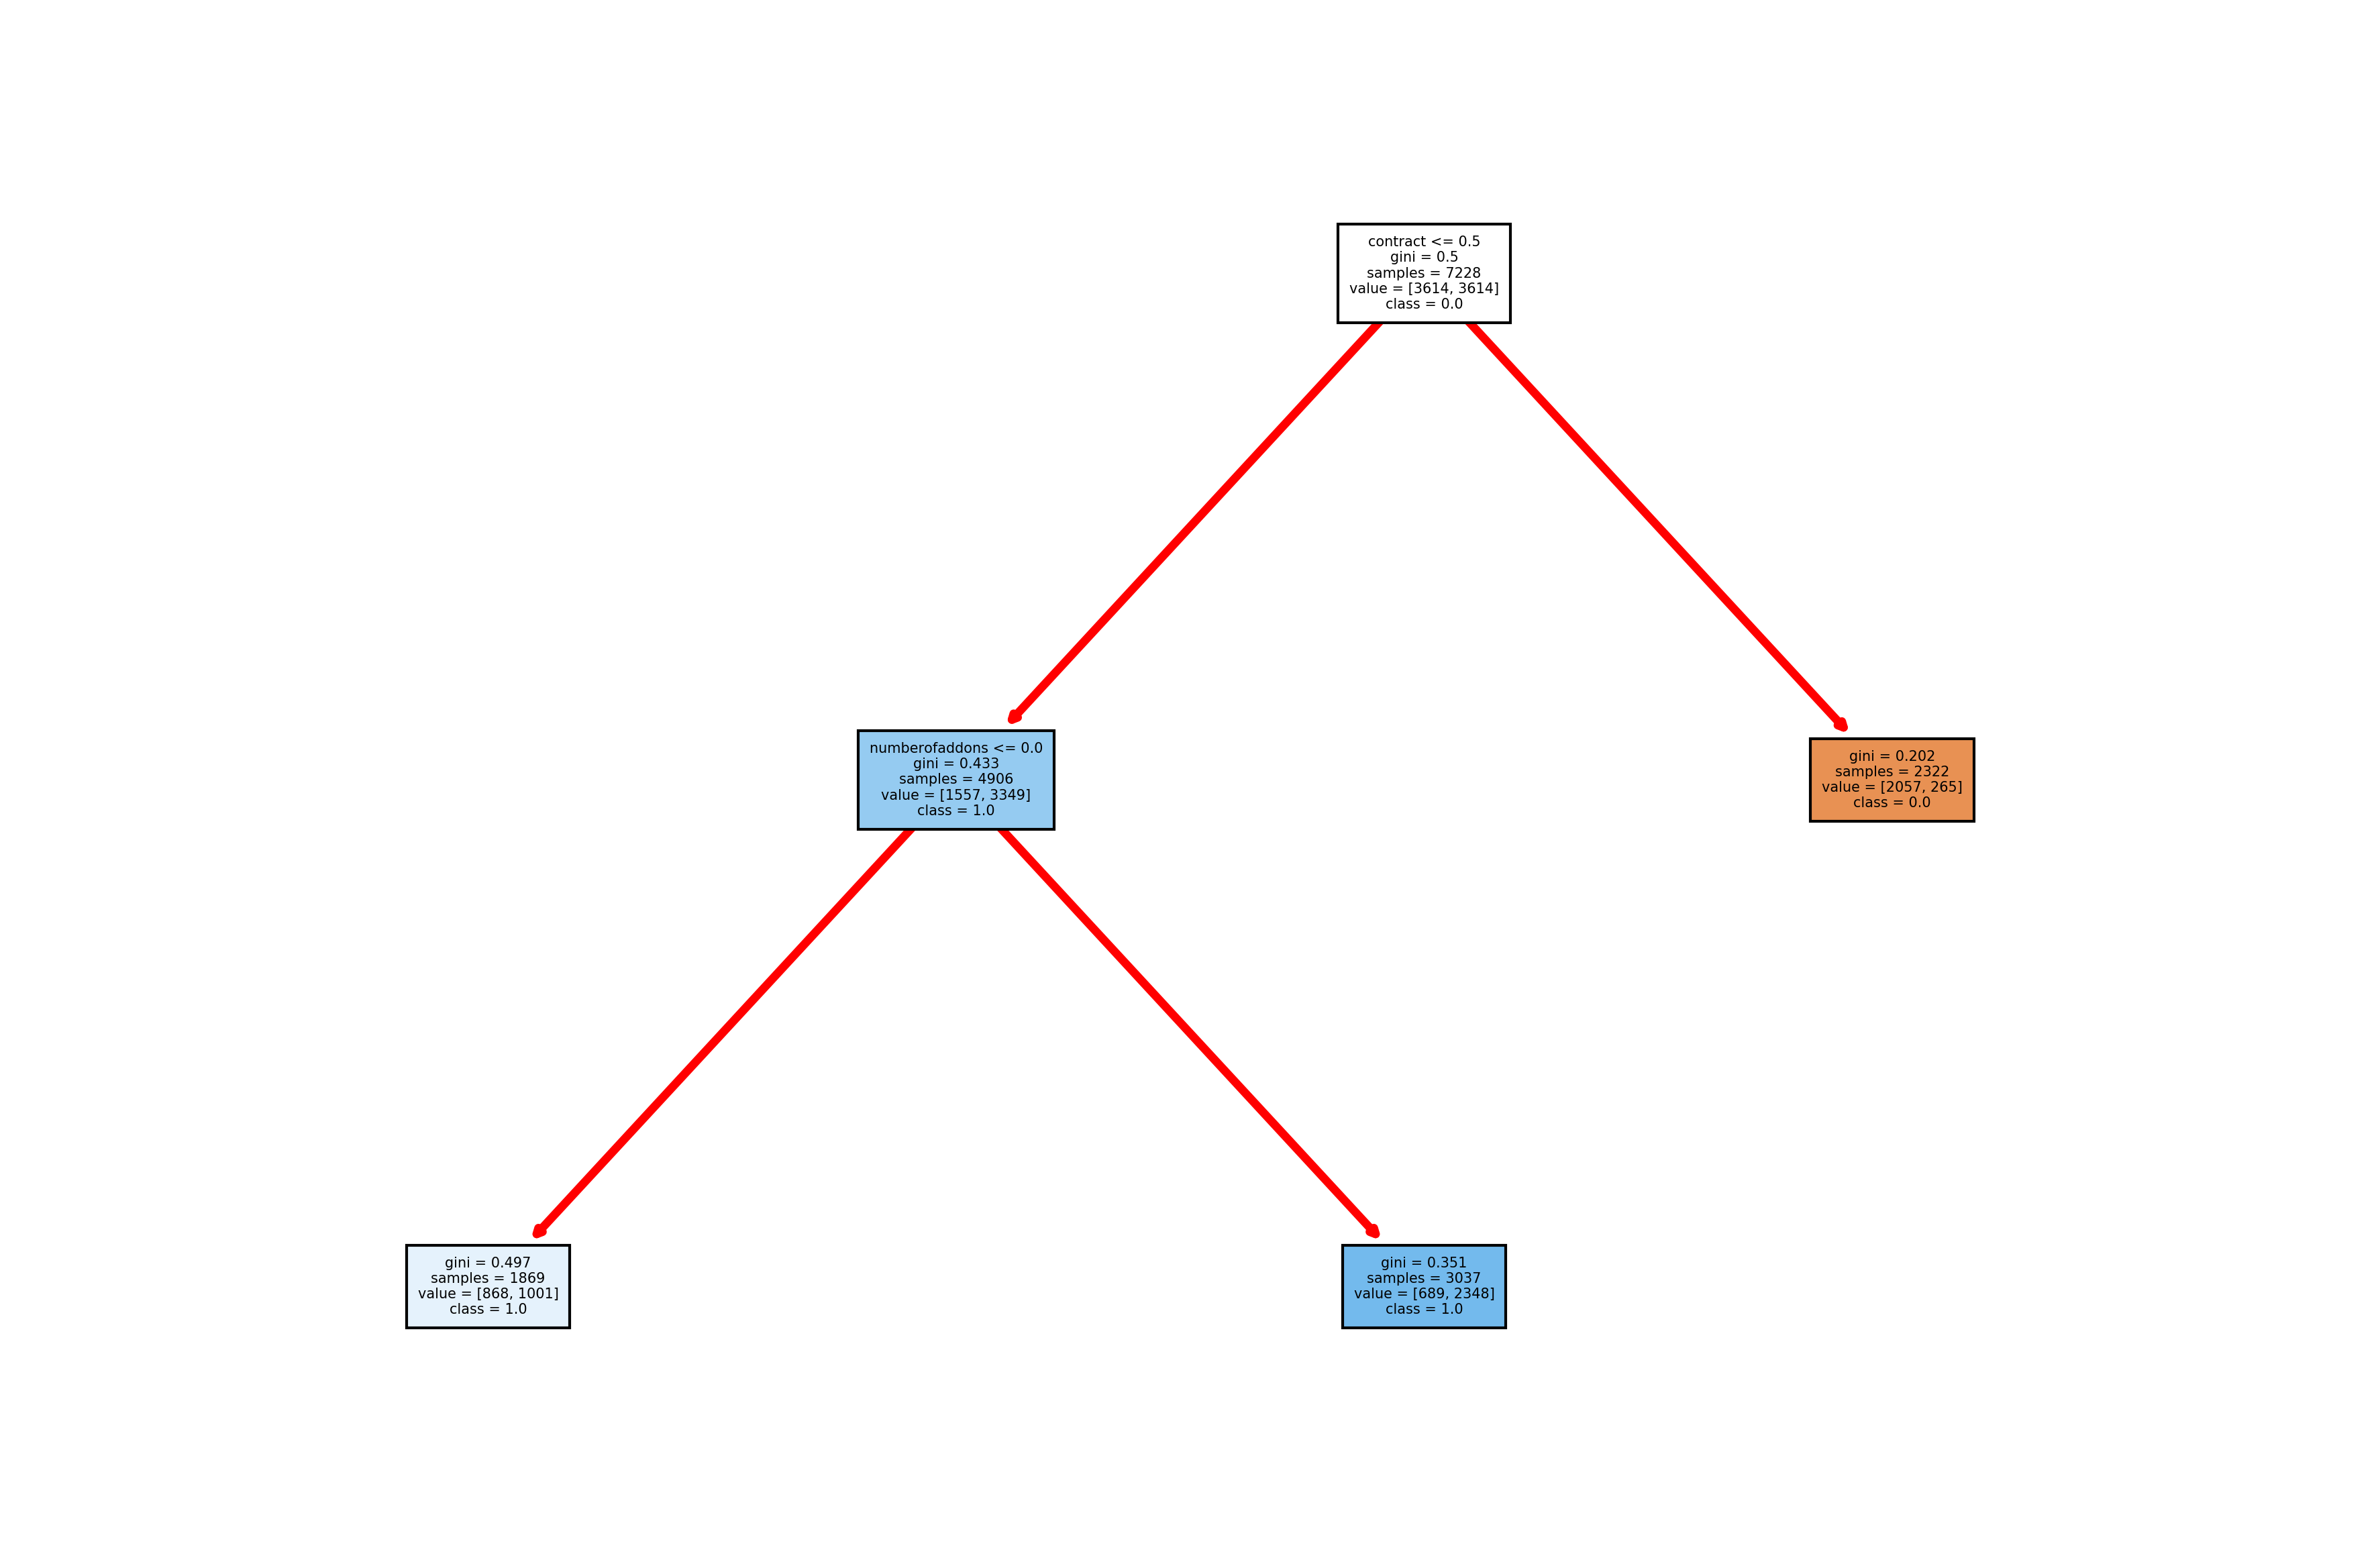

In [144]:
create_decisiontree('pipe_dt_fe_best', dt_best, df_featureengineered_dummified,
                    X_fe_train_smote, y_fe_train_smote, y_fe)

## Results:
#### The fourth iteration model is a Decision Tree with feature engineering to remove unnecessary variables, SMOTE to address class imbalance, and hyperparameter tuning
* The decision tree classifier has a max_depth=3
* One of the most effective parameters that I had adjusted is complexity parameter used for minimal cost-complexity pruning
* Recall of the test data = 86.8%
* The recall percentage of 86.8% in layman's terms means, "86.8% of customers who churned were correctly classified by the model."

## Next Steps:
1.  Visualize and explore some relationships between the most significant features affecting whether or not a customer churns.

## Visualizing the various models and their metrics

In [149]:
data = [['pipe_1', 'Decision Tree', 0.510, 0.510, 0, 'None', 'No', 'Vanilla Model (Decision Tree)'],
        ['pipe_2', 'Decision Tree', 0.815, 0.738, 1, 'SMOTE', 'No', 'Decision Tree introducing SMOTE'],
        ['pipe_3', 'Decision Tree', 0.742, 0.722, 2, 'class_weight="balanced"', 'No', 'Decision Tree with modeling parameter class_weight="Balanced"'],
        ['pipe_4', 'Decision Tree', 0.894, 0.832, 3, 'SMOTE', 'Yes', 'Decision Tree with SMOTE introducing Feature Engineering'],
        ['pipe_knn', 'K-Nearest Neighbors', 0.951, 0.684, 4, 'SMOTE', 'No', 'K-Nearest Neighbors without Feature Engineering'],
        ['pipe_knn_fe', 'K-Nearest Neighbors', 0.929, 0.670, 5, 'SMOTE', 'Yes', 'K-Nearest Neighbors with Feature Engineering'],
        ['pipe_rf', 'Random Forest', 0.861, 0.786, 6, 'SMOTE', 'No', 'Random Forest without Feature Engineering'],
        ['pipe_rf_fe', 'Random Forest', 0.855, 0.791, 7, 'SMOTE', 'Yes', 'Random Forest with Feature Engineering'],
        ['pipe_dt_fe_best', 'Decision Tree', 0.927, 0.868, 8, 'SMOTE', 'Yes', 'Decision Tree with SMOTE, Feature Engineering, and Hyperparameter Tuning']] 
  
# Create the pandas DataFrame 
df_pipelines = pd.DataFrame(data, columns = ['Name of Pipeline', 'Name of Classification Modeling Technique',
                                             'Training Recall Score', 'Test Recall Score', 'Model Number',
                                             'Addressed Class Imbalance Using', 'Feature Engineering Implemented', 'Title']) 
  
df_pipelines

,Name of Pipeline,Name of Classification Modeling Technique,Training Recall Score,Test Recall Score,Model Number,Addressed Class Imbalance Using,Feature Engineering Implemented,Title
0,pipe_1,Decision Tree,0.510,0.510,0,None,No,Vanilla Model (Decision Tree)
1,pipe_2,Decision Tree,0.815,0.738,1,SMOTE,No,Decision Tree introducing SMOTE
2,pipe_3,Decision Tree,0.742,0.722,2,"class_weight=""balanced""",No,Decision Tree with modeling parameter class_we...
3,pipe_4,Decision Tree,0.894,0.832,3,SMOTE,Yes,Decision Tree with SMOTE introducing Feature E...
4,pipe_knn,K-Nearest Neighbors,0.951,0.684,4,SMOTE,No,K-Nearest Neighbors without Feature Engineering
5,pipe_knn_fe,K-Nearest Neighbors,0.929,0.670,5,SMOTE,Yes,K-Nearest Neighbors with Feature Engineering
6,pipe_rf,Random Forest,0.861,0.786,6,SMOTE,No,Random Forest without Feature Engineering
7,pipe_rf_fe,Random Forest,0.855,0.791,7,SMOTE,Yes,Random Forest with Feature Engineering
8,pipe_dt_fe_best,Decision Tree,0.927,0.868,8,SMOTE,Yes,"Decision Tree with SMOTE, Feature Engineering,..."


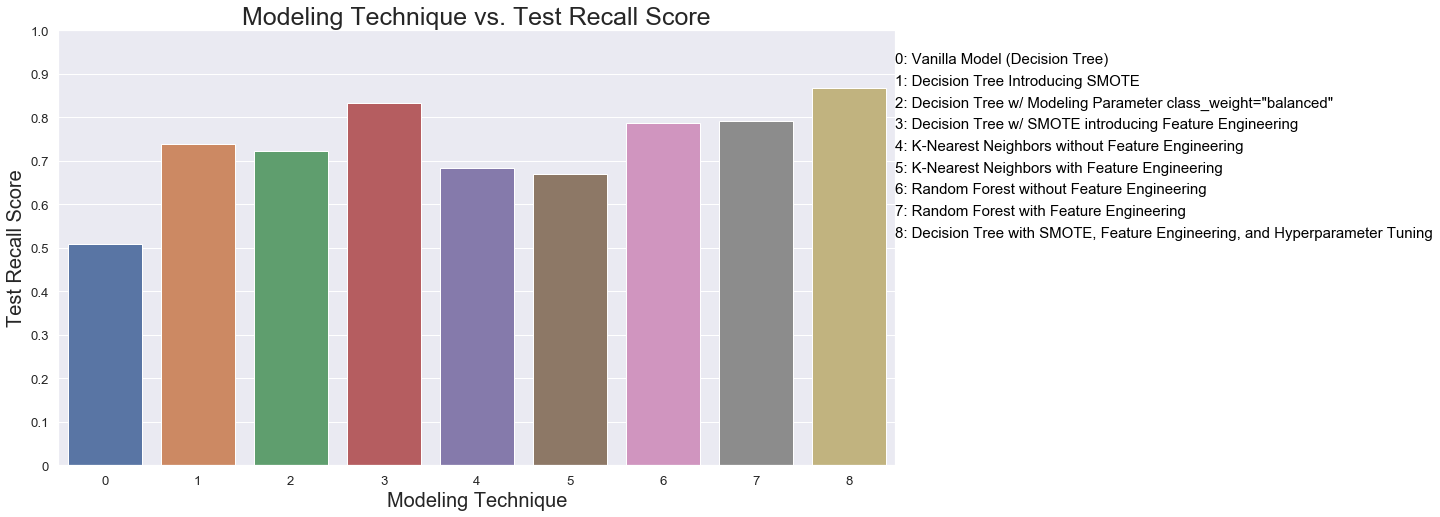

In [178]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.2)
pal = sns.color_palette("husl", 8)
ax = sns.barplot(df_pipelines['Model Number'], df_pipelines['Test Recall Score'])
ax.set_title('Modeling Technique vs. Test Recall Score', fontsize=25)
ax.set_xlabel('Modeling Technique', fontsize=20)
ax.set_ylabel('Test Recall Score', fontsize=20)
ax.text(1, 0.95, '0: Vanilla Model (Decision Tree)', color='black',
        horizontalalignment='left', fontsize=15,
        verticalalignment='top',
        transform=ax.transAxes)
ax.text(1, 0.9, '1: Decision Tree Introducing SMOTE', color='black',
        horizontalalignment='left', fontsize=15,
        verticalalignment='top',
        transform=ax.transAxes)
ax.text(1, 0.85, '2: Decision Tree w/ Modeling Parameter class_weight="balanced"', color='black',
        horizontalalignment='left', fontsize=15,
        verticalalignment='top',
        transform=ax.transAxes)
ax.text(1, 0.8, '3: Decision Tree w/ SMOTE introducing Feature Engineering', color='black',
        horizontalalignment='left', fontsize=15,
        verticalalignment='top',
        transform=ax.transAxes)
ax.text(1, 0.75, '4: K-Nearest Neighbors without Feature Engineering', color='black',
        horizontalalignment='left', fontsize=15,
        verticalalignment='top',
        transform=ax.transAxes)
ax.text(1, 0.70, '5: K-Nearest Neighbors with Feature Engineering', color='black',
        horizontalalignment='left', fontsize=15,
        verticalalignment='top',
        transform=ax.transAxes)
ax.text(1, 0.65, '6: Random Forest without Feature Engineering', color='black',
        horizontalalignment='left', fontsize=15,
        verticalalignment='top',
        transform=ax.transAxes)
ax.text(1, 0.6, '7: Random Forest with Feature Engineering', color='black',
        horizontalalignment='left', fontsize=15,
        verticalalignment='top',
        transform=ax.transAxes)
ax.text(1, 0.55, '8: Decision Tree with SMOTE, Feature Engineering, and Hyperparameter Tuning', color='black',
        horizontalalignment='left', fontsize=15,
        verticalalignment='top',
        transform=ax.transAxes)
ax.set_ylim(bottom=0, top=1)
ax.set_yticks((0,.10,.20,.30,.40,.50,.60,.70,.80,.90,1.00)) 
ax.set_yticklabels((0,.10,.20,.30,.40,.50,.60,.70,.80,.90,1.00));